Erstes ML-Modell mit SciKit-Learn

In [142]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Laden der zwei Datasets Walking, Jumping

In [143]:
df_run = pd.read_json("walking.json")

df_jump = pd.read_json("jumping.json")

In [144]:
df_run.head()

,sensor,time,seconds_elapsed,z,y,x,relativeAltitude,pressure,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs
0,Accelerometer,1.680094e+18,-2.581087e+06,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AccelerometerUncalibrated,1.682675e+18,7.725342e-03,-0.814392,-0.224945,0.091278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AccelerometerUncalibrated,1.682675e+18,1.778906e-02,-0.866867,-0.202026,0.093414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AccelerometerUncalibrated,1.682675e+18,2.785327e-02,-0.972351,-0.206985,0.071457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AccelerometerUncalibrated,1.682675e+18,3.791602e-02,-1.046967,-0.221313,0.047256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df_jump.head()

,sensor,time,seconds_elapsed,z,y,x,relativeAltitude,pressure,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs
0,Accelerometer,1.680094e+18,-2.580953e+06,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AccelerometerUncalibrated,1.682675e+18,1.266040e-02,-0.631042,-0.439758,0.100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AccelerometerUncalibrated,1.682675e+18,2.272437e-02,-0.633957,-0.460037,0.071823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AccelerometerUncalibrated,1.682675e+18,3.278833e-02,-0.648392,-0.509354,0.051224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AccelerometerUncalibrated,1.682675e+18,4.285132e-02,-0.650299,-0.554092,0.033859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extraktion von 3 lediglich Sensor Daten: Acceleration Data Uncalibrated

In [146]:
#preprocessing data
df_run['time'] = pd.to_datetime(df_run['time'])
df_jump['time'] = pd.to_datetime(df_jump['time'])

df_run.head()

,sensor,time,seconds_elapsed,z,y,x,relativeAltitude,pressure,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs
0,Accelerometer,2023-03-29 12:42:42.240752384,-2.581087e+06,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AccelerometerUncalibrated,2023-04-28 09:40:49.120725248,7.725342e-03,-0.814392,-0.224945,0.091278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AccelerometerUncalibrated,2023-04-28 09:40:49.130789120,1.778906e-02,-0.866867,-0.202026,0.093414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AccelerometerUncalibrated,2023-04-28 09:40:49.140853248,2.785327e-02,-0.972351,-0.206985,0.071457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AccelerometerUncalibrated,2023-04-28 09:40:49.150916096,3.791602e-02,-1.046967,-0.221313,0.047256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extraktion der richtigen Sensor-Daten:

In [147]:
df_run_acc = df_run[df_run['sensor'] == 'AccelerometerUncalibrated']
df_jump_acc = df_jump[df_jump['sensor'] == 'AccelerometerUncalibrated']

In [148]:
df_run = df_run.set_index('time')
df_jump = df_jump.set_index('time')

df_jump_acc.head()

,sensor,time,seconds_elapsed,z,y,x,relativeAltitude,pressure,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs
1,AccelerometerUncalibrated,2023-04-28 09:38:35.153660416,0.012660,-0.631042,-0.439758,0.100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AccelerometerUncalibrated,2023-04-28 09:38:35.163724288,0.022724,-0.633957,-0.460037,0.071823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AccelerometerUncalibrated,2023-04-28 09:38:35.173788416,0.032788,-0.648392,-0.509354,0.051224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AccelerometerUncalibrated,2023-04-28 09:38:35.183851264,0.042851,-0.650299,-0.554092,0.033859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AccelerometerUncalibrated,2023-04-28 09:38:35.193915392,0.052915,-0.634171,-0.532410,0.061371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df_run_acc = df_run_acc[['z','y','x']]
df_jump_acc = df_jump_acc[['z','y','x']]

Erstellung eines Trainings und Test-Datensatzes:

<Axes: xlabel='time'>

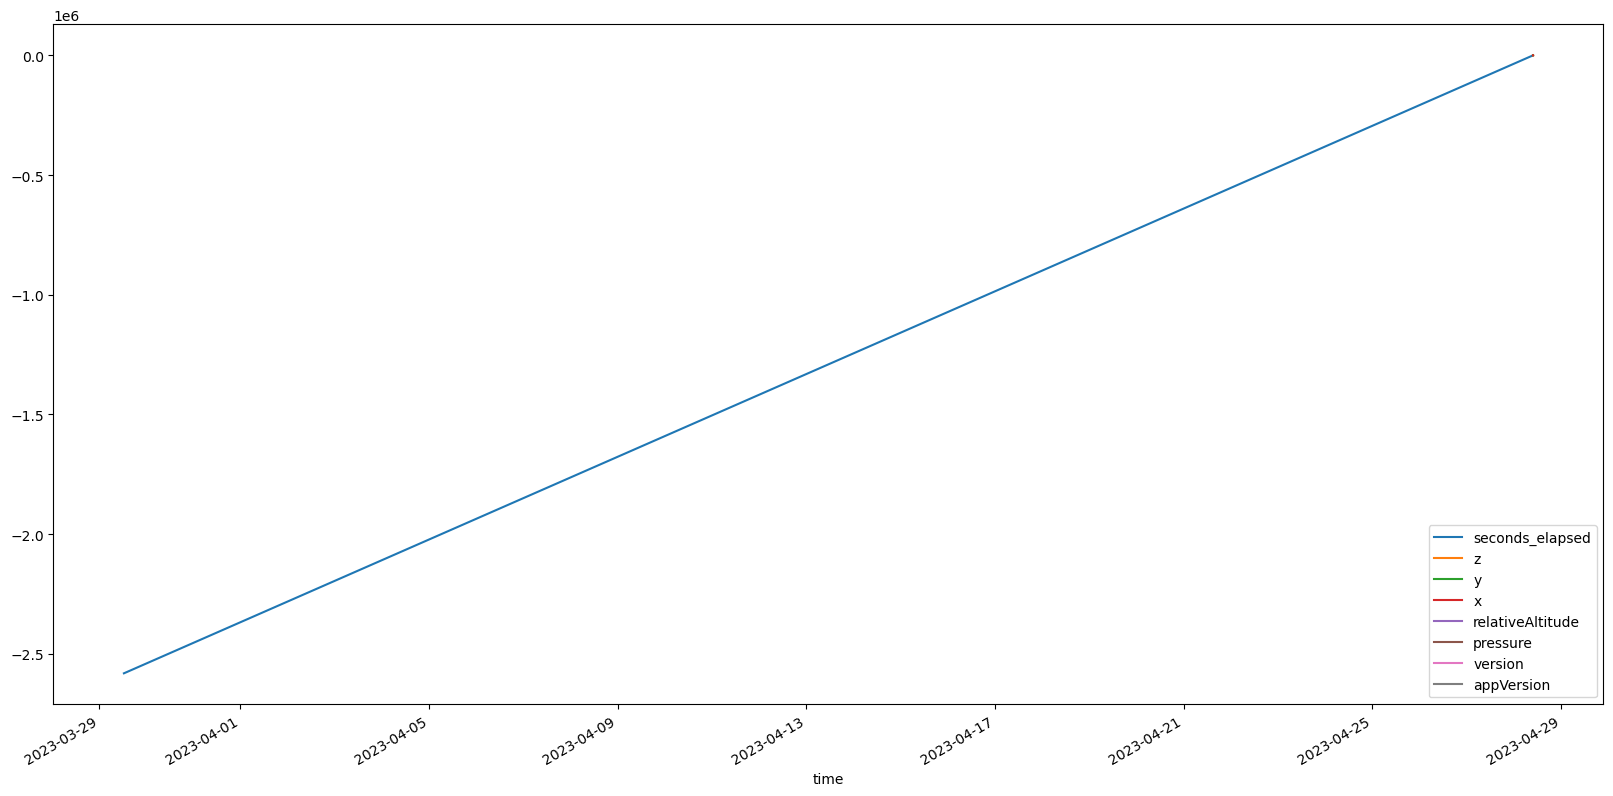

In [150]:
df_run.plot(figsize=(20,10))

In [151]:
df_run_acc['running'] = True
df_jump_acc['jumping'] = True
df_combined = pd.concat([df_run_acc, df_jump_acc], ignore_index=True)

In [152]:
#Anzahl der Reihen RowCount
len(df_run_acc)
#Label hinzufügen

display(df_combined)

/Users/maxholzinger/anaconda3/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/maxholzinger/anaconda3/lib/python3.10/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,z,y,x,running,jumping
0,-0.814392,-0.224945,0.091278,True,NaN
1,-0.866867,-0.202026,0.093414,True,NaN
2,-0.972351,-0.206985,0.071457,True,NaN
3,-1.046967,-0.221313,0.047256,True,NaN
4,-1.037567,-0.234909,-0.014023,True,NaN
...,...,...,...,...,...
9297,-0.825531,-0.490295,0.168243,NaN,True
9298,-0.837952,-0.491364,0.166840,NaN,True
9299,-0.849060,-0.485641,0.163971,NaN,True
9300,-0.859299,-0.479340,0.159760,NaN,True


In [153]:
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(df_combined):
    X_train, X_test = df_combined.iloc[train_index][['z','y','x']], df_combined.iloc[test_index][['z','y','x']]
    y_train, y_test = df_combined.iloc[train_index][['running','jumping']], df_combined.iloc[test_index][['running','jumping']]

    # Skalieren Sie die Daten
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Passen Sie einen Klassifikator an
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)

    # Evaluieren Sie die Leistung des Klassifikators
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

ValueError: y should be a 1d array, got an array of shape (1552, 2) instead.